In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv(".\CareerMapping1.csv")

In [27]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [28]:
x = data.drop('Role', axis=1)  # Features
y = data['Role']  # Target variable


In [29]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [30]:


# Print the mapping of original labels to encoded values
for original_label, encoded_label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{original_label} -> {encoded_label}")

# Optional: Print the encoded values
# print("Encoded labels:", y_encoded)


AI ML Specialist -> 0
API Specialist -> 1
Application Support Engineer -> 2
Business Analyst -> 3
Customer Service Executive -> 4
Cyber Security Specialist -> 5
Database Administrator -> 6
Graphics Designer -> 7
Hardware Engineer -> 8
Helpdesk Engineer -> 9
Information Security Specialist -> 10
Networking Engineer -> 11
Project Manager -> 12
Software Developer -> 13
Software tester -> 14
Technical Writer -> 15


In [31]:
y

array([ 6,  6,  6, ..., 13,  8,  9])

In [32]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.5)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.6)

In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

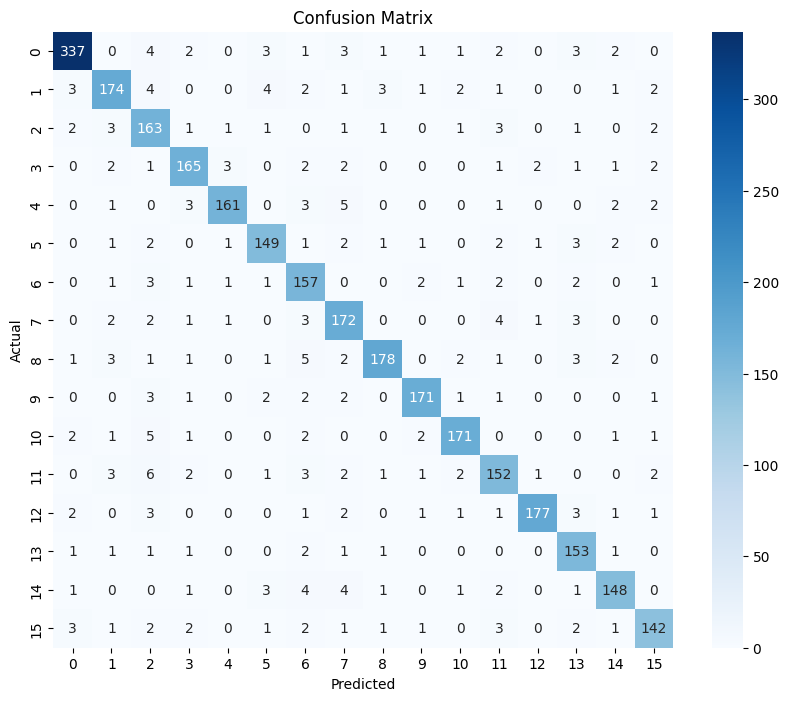

In [34]:
predictions = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9070072036673216


In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       360
           1       0.90      0.88      0.89       198
           2       0.81      0.91      0.86       180
           3       0.91      0.91      0.91       182
           4       0.96      0.90      0.93       178
           5       0.90      0.90      0.90       166
           6       0.83      0.91      0.87       172
           7       0.86      0.91      0.88       189
           8       0.95      0.89      0.92       200
           9       0.94      0.93      0.94       184
          10       0.93      0.92      0.93       186
          11       0.86      0.86      0.86       176
          12       0.97      0.92      0.94       193
          13       0.87      0.94      0.91       162
          14       0.91      0.89      0.90       166
          15       0.91      0.88      0.89       162

    accuracy                           0.91      3054
   macro avg       0.91   

ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of labels (27).

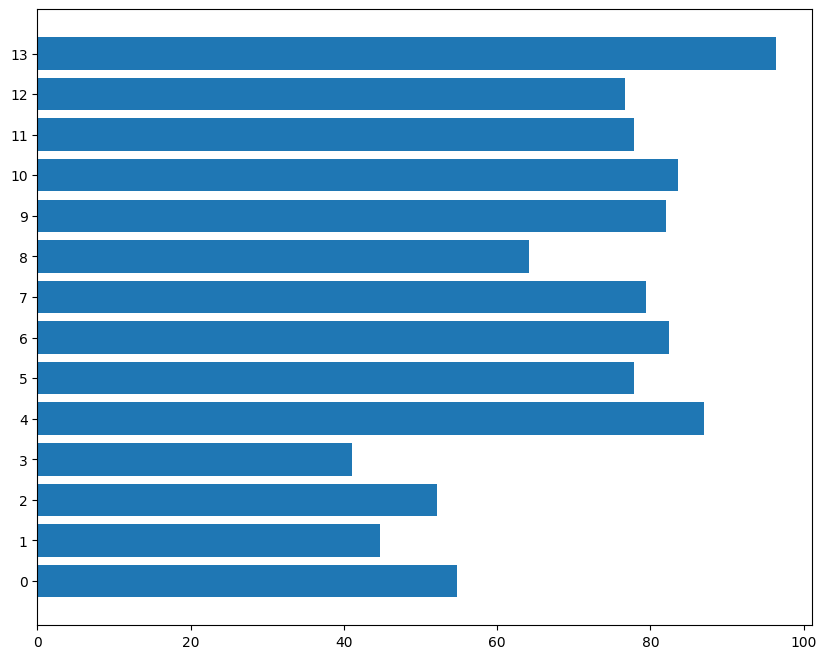

In [37]:
a=model.feature_importances_

data = a * 1000
labels = ['Database Fundamentals', 'Computer Architecture',
       'Distributed Computing Systems', 'Cyber Security', 'Networking',
       'Software Development', 'Programming Skills', 'Project Management',
       'Computer Forensics Fundamentals', 'Technical Communication', 'AI ML',
       'Software Engineering', 'Business Analysis', 'Communication skills',
       'Data Science', 'Troubleshooting skills', 'Graphics Designing',
       'Openness', 'Conscientousness', 'Extraversion', 'Agreeableness',
       'Emotional_Range', 'Conversation', 'Openness to Change', 'Hedonism',
       'Self-enhancement', 'Self-transcendence']

indices = range(len(data))

plt.figure(figsize=(10, 8))
plt.barh(indices, data, align='center')
plt.yticks(indices, labels)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


In [ ]:
list=[]
estimators = [200, 225, 250, 300]  #
# depth
features = [i for i in range(10,15)]
min_samples_s = [7, 8, 9, 10] #[2, 3, 4, 5, 6]
min_samples_l = [6, 7, 8, 9] #[2, 3]
for i in estimators:
#     for j in depth:
    for k in features:
        for l in min_samples_s:
            for m in min_samples_l:
                rf2=RandomForestClassifier(n_estimators=i,
                                          max_features=k,min_samples_split=l,min_samples_leaf=m)
                rf2.fit(x_train,y_train)
                y_train_pred = rf2.predict(x_train)
                train_accuracy = accuracy_score(y_train, y_train_pred)
                y_val_pred = rf2.predict(x_val)
                val_accuracy = accuracy_score(y_val, y_val_pred)
                list.append((i, k, l, m, train_accuracy, val_accuracy))
                print(f'''For n_estimators:{i},max_features:{k},min_samples_split:{l},min_samples_leaf:{m}
                train accuracy:{train_accuracy} validation accuracy:{val_accuracy}''')


For n_estimators:200,max_features:10,min_samples_split:7,min_samples_leaf:6
                train accuracy:0.984869325997249 validation accuracy:0.9052062868369352
For n_estimators:200,max_features:10,min_samples_split:7,min_samples_leaf:7
                train accuracy:0.9772057378659854 validation accuracy:0.9071709233791748
For n_estimators:200,max_features:10,min_samples_split:7,min_samples_leaf:8
                train accuracy:0.967773629396738 validation accuracy:0.906679764243615
For n_estimators:200,max_features:10,min_samples_split:7,min_samples_leaf:9
                train accuracy:0.9603065435252506 validation accuracy:0.9056974459724951
For n_estimators:200,max_features:10,min_samples_split:8,min_samples_leaf:6
                train accuracy:0.984869325997249 validation accuracy:0.906188605108055
For n_estimators:200,max_features:10,min_samples_split:8,min_samples_leaf:7
                train accuracy:0.9789742582039693 validation accuracy:0.906679764243615
For n_estimators

In [ ]:
print(list)
all_test_acc=[list[i][4] for i in range(len(list))]
all_val_acc=[list[i][5] for i in range(len(list))]
print(all_test_acc)
print(all_val_acc)

[(200, 10, 7, 6, 0.9827078011397131, 0.9056974459724951), (200, 10, 7, 7, 0.9764197288268815, 0.9027504911591355), (200, 10, 7, 8, 0.9713106700727059, 0.9032416502946955), (200, 10, 7, 9, 0.9656121045392022, 0.9022593320235757), (200, 10, 8, 6, 0.9821182943603851, 0.9012770137524558), (200, 10, 8, 7, 0.9766162310866575, 0.9022593320235757), (200, 10, 8, 8, 0.9705246610336019, 0.9037328094302554), (200, 10, 8, 9, 0.9646295932403223, 0.9027504911591355), (200, 10, 9, 6, 0.983100805659265, 0.9037328094302554), (200, 10, 9, 7, 0.9766162310866575, 0.9047151277013753), (200, 10, 9, 8, 0.9736686971900177, 0.9027504911591355), (200, 10, 9, 9, 0.9667911180978581, 0.9007858546168959), (200, 10, 10, 6, 0.9829043033994891, 0.9032416502946955), (200, 10, 10, 7, 0.9803497740224013, 0.9027504911591355), (200, 10, 10, 8, 0.9715071723324818, 0.9037328094302554), (200, 10, 10, 9, 0.9650225977598742, 0.9022593320235757), (200, 11, 7, 6, 0.9825112988799372, 0.9037328094302554), (200, 11, 7, 7, 0.976616231

In [ ]:
import heapq
max_5_val_acc = heapq.nlargest(10, all_val_acc)
max_5_val_acc

[0.906679764243615,
 0.906188605108055,
 0.906188605108055,
 0.9056974459724951,
 0.9056974459724951,
 0.9056974459724951,
 0.9056974459724951,
 0.9056974459724951,
 0.9056974459724951,
 0.9056974459724951]

In [ ]:
for i in range(len(max_5_val_acc)):
    print(list[all_val_acc.index(max_5_val_acc[i])])

(250, 13, 10, 6, 0.9805462762821773, 0.906679764243615)
(300, 13, 7, 6, 0.9793672627235214, 0.906188605108055)
(300, 13, 7, 6, 0.9793672627235214, 0.906188605108055)
(200, 10, 7, 6, 0.9827078011397131, 0.9056974459724951)
(200, 10, 7, 6, 0.9827078011397131, 0.9056974459724951)
(200, 10, 7, 6, 0.9827078011397131, 0.9056974459724951)
(200, 10, 7, 6, 0.9827078011397131, 0.9056974459724951)
(200, 10, 7, 6, 0.9827078011397131, 0.9056974459724951)
(200, 10, 7, 6, 0.9827078011397131, 0.9056974459724951)
(200, 10, 7, 6, 0.9827078011397131, 0.9056974459724951)


In [ ]:
rf=RandomForestClassifier(n_estimators=200,max_features=14,min_samples_split=8,min_samples_leaf=7)
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_val_pred = rf.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
y_test_pred = rf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(val_accuracy)
print(test_accuracy)

0.9709176655531538
0.9037328094302554
0.904060248853962


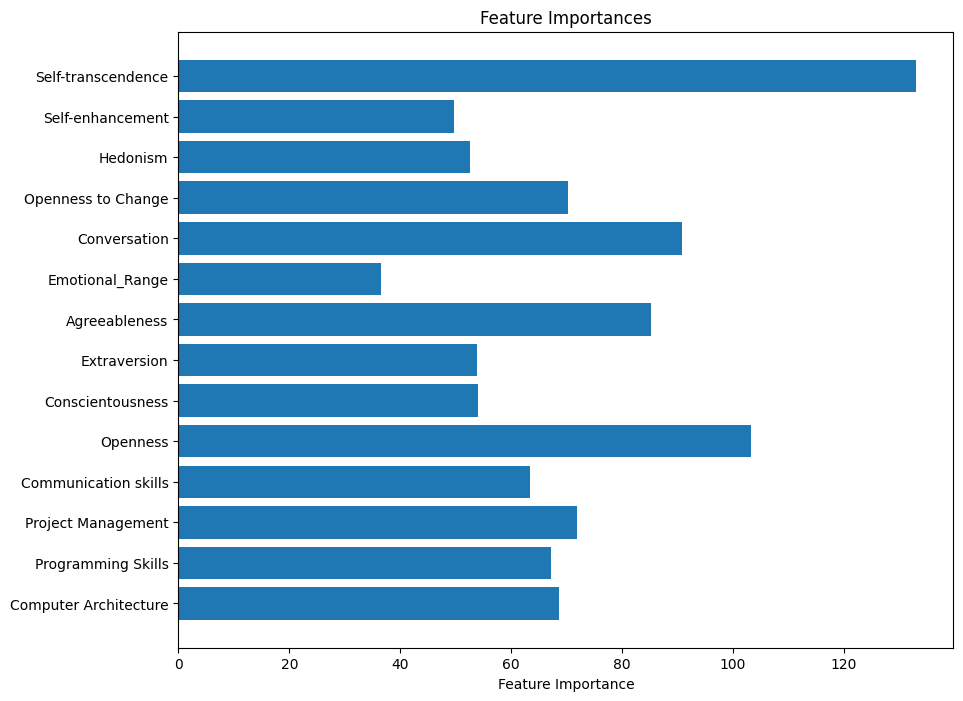

In [ ]:
a=rf.feature_importances_

fi_data = a * 1000
labels = ['Computer Architecture', 'Programming Skills', 'Project Management',
       'Communication skills', 'Openness', 'Conscientousness', 'Extraversion',
       'Agreeableness', 'Emotional_Range', 'Conversation',
       'Openness to Change', 'Hedonism', 'Self-enhancement',
       'Self-transcendence']

indices = range(len(fi_data))

plt.figure(figsize=(10, 8))
plt.barh(indices, fi_data, align='center')
plt.yticks(indices, labels)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


[[98.03600655  0.          0.32733224  0.32733224  0.          0.16366612
   0.          0.16366612  0.          0.          0.          0.16366612
   0.          0.49099836  0.16366612  0.16366612]
 [ 0.33333333 95.66666667  1.33333333  0.          0.          0.
   0.          0.33333333  0.          0.          0.          0.
   0.          1.66666667  0.66666667  0.        ]
 [ 0.          0.         97.5         0.71428571  0.          0.
   0.          0.71428571  0.          0.          0.          0.35714286
   0.          0.35714286  0.          0.35714286]
 [ 0.          0.          0.66445183 97.34219269  0.          0.
   0.          0.          0.          0.          0.33222591  0.66445183
   0.          0.99667774  0.          0.        ]
 [ 0.          0.35714286  0.71428571  0.         97.14285714  0.35714286
   0.          0.35714286  0.          0.          0.          0.
   0.          1.07142857  0.          0.        ]
 [ 0.          0.          0.6557377   0.    

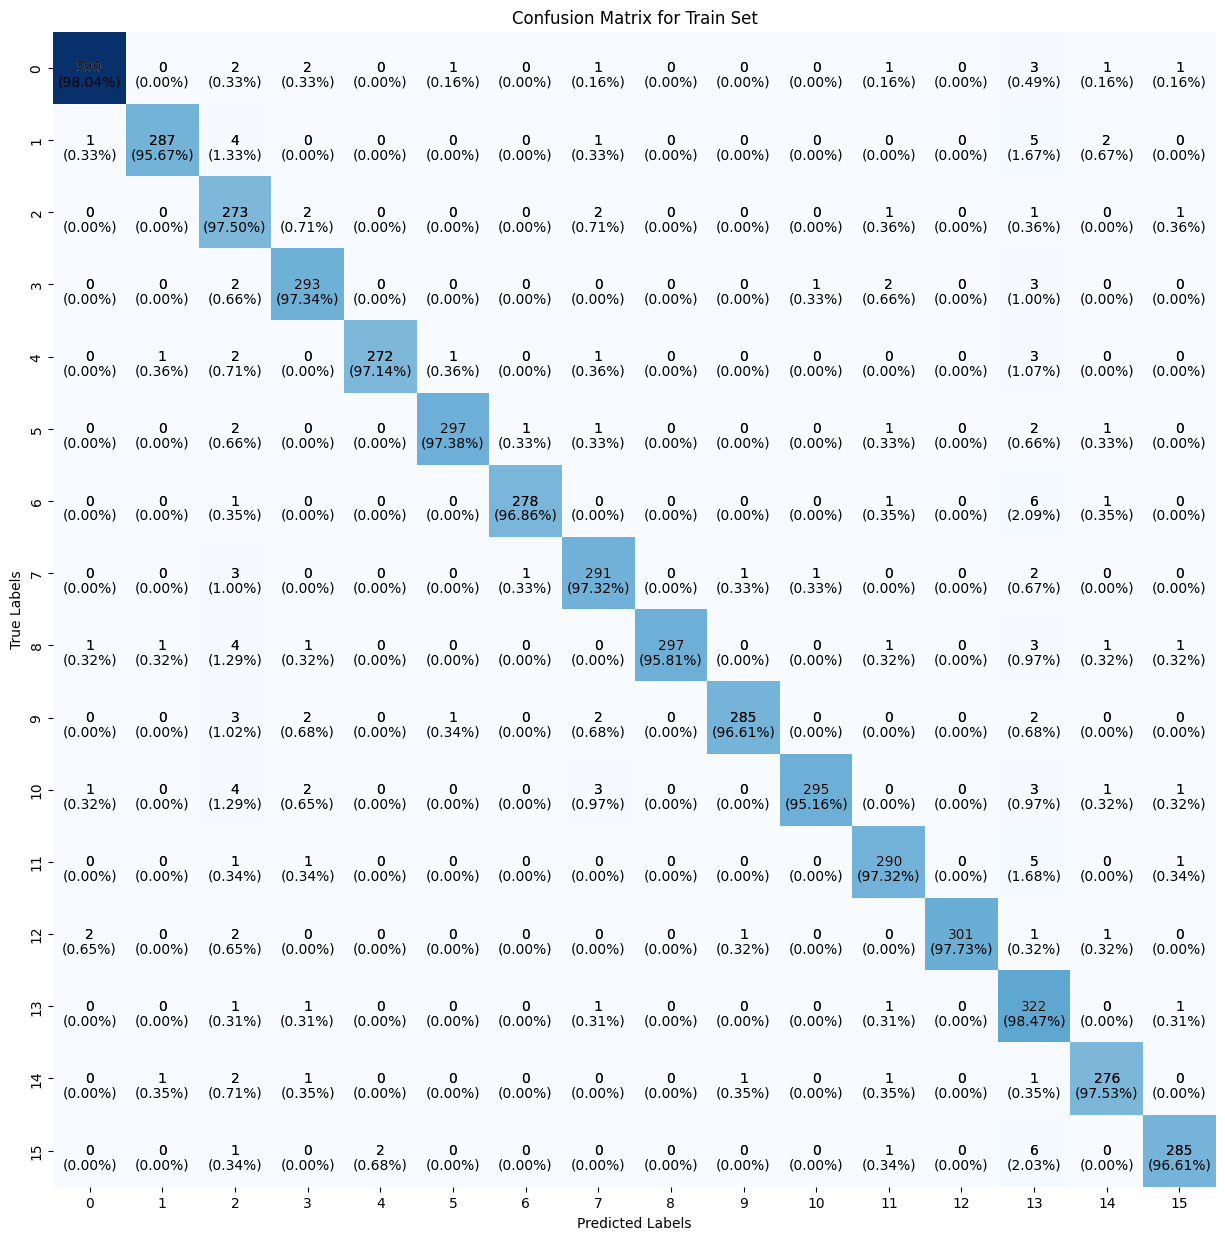

In [ ]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

[[95.83333333  0.          0.96153846  0.64102564  0.          0.
   0.          0.32051282  0.32051282  0.32051282  0.          0.32051282
   0.          0.32051282  0.32051282  0.64102564]
 [ 0.         86.84210526  2.63157895  1.57894737  0.          1.05263158
   0.          1.57894737  0.          1.05263158  0.          2.10526316
   0.          2.63157895  0.          0.52631579]
 [ 0.          0.51020408 89.28571429  1.02040816  0.51020408  0.51020408
   0.51020408  1.53061224  1.02040816  1.53061224  0.51020408  1.02040816
   0.          2.04081633  0.          0.        ]
 [ 0.54945055  0.          3.2967033  86.81318681  0.          0.
   0.          2.1978022   0.          1.0989011   0.54945055  1.0989011
   1.0989011   1.0989011   1.64835165  0.54945055]
 [ 1.57068063  0.          0.52356021  0.52356021 90.05235602  0.52356021
   0.          0.52356021  0.52356021  0.          0.          1.04712042
   1.04712042  0.52356021  1.57068063  1.57068063]
 [ 0.65359477  0.     

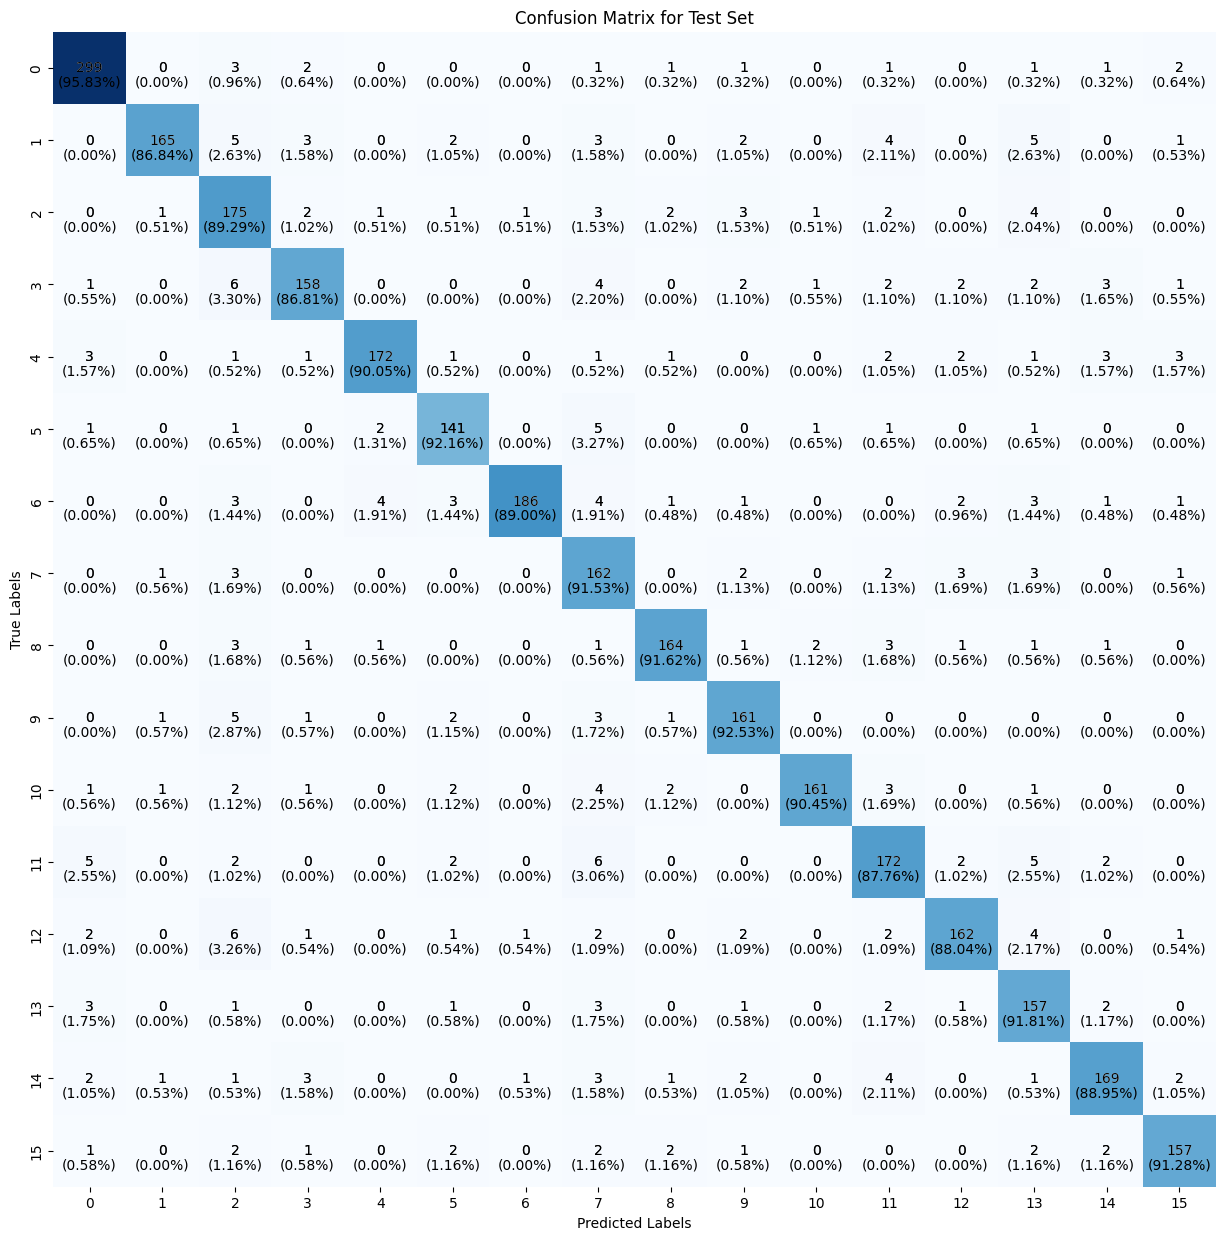

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [ ]:
import joblib
joblib.dump(model, "career_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']